In [1]:
import pandas as pd
import time
import math
import numpy as np
import csv
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.offline as pyo
import seaborn as sns
from plotly.subplots import make_subplots
#sklearn#
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc

In [2]:
# draw corr hot map
def draw_corr_map(df,method='pearson'):
    """
    绘制相关系数热力图
    df: 数据框
    method: 相关系数方法（pearson、kendall或spearman）
    """
    # 计算相关系数矩阵
    corr_map = df.corr(method=method)

    # 设置图表尺寸和字体大小
    sns.set(rc={'figure.figsize':(11, 9), 'font.size': 11})

    # 绘制相关系数热力图
    sns.heatmap(corr_map, annot=True, cmap='coolwarm')

        # 旋转x轴标签
    plt.xticks(rotation=45)
    # 返回相关系数矩阵
    return corr_map

In [3]:
origin_df = pd.read_csv('data20.csv',sep=',',encoding='gbk',index_col=0)
origin_df['REPEAT'] = origin_df['REPEAT'].astype(int)
origin_df

,ISCEDL,REPEAT,BFactor,ESCS2,HOMEPOS2,IC150Q06HA,IC151Q06HA,IC152Q06HA,IC150Q08HA,IC151Q08HA,IC152Q08HA,IC150Q09HA,IC151Q09HA,IC152Q09HA,newBMMJ1,newBFMJ2,newHISEI,newBSMJ,OCOD2_encoded,COBN_F_encoded
0,3.0,0,2.124063,-0.076844,-0.409900,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,0.577165,0.251187,0.577165,0.718547,-0.111441,-1.290454
1,3.0,0,3.304806,0.483093,0.412069,1.0,1.0,4.0,5.0,5.0,5.0,1.0,1.0,4.0,0.695574,0.909686,0.909686,0.789860,-1.434410,-1.290454
2,3.0,0,1.462183,-0.234459,-0.157313,1.0,4.0,4.0,1.0,5.0,5.0,1.0,5.0,5.0,0.076844,0.224631,0.224631,0.936076,0.354154,-1.290454
3,3.0,0,3.127410,0.376105,0.228058,1.0,1.0,4.0,5.0,1.0,5.0,2.0,3.0,1.0,0.842078,0.842078,0.842078,0.601176,-1.264071,-1.290454
4,3.0,0,1.567424,-0.168265,-0.089251,1.0,1.0,4.0,1.0,1.0,4.0,2.0,1.0,3.0,0.312123,0.224631,0.312123,0.718547,0.354154,-1.290454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42171,2.0,0,2.702523,0.267168,-0.026126,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.840026,0.421296,0.840026,0.601176,-1.644495,1.981418
42172,2.0,1,1.187950,0.145445,0.328311,1.8,4.0,2.0,1.8,3.0,2.0,2.2,4.0,2.0,0.068890,0.200257,0.200257,0.718547,0.257628,-0.001535
42173,2.0,0,2.917874,0.479739,0.410813,1.0,1.0,4.0,1.0,1.0,4.0,2.0,1.0,4.0,0.257473,0.903015,0.903015,0.854372,-1.542292,0.593351
42174,2.0,1,0.669094,-0.401591,-0.181399,2.0,2.0,3.0,1.0,1.2,3.0,3.0,1.0,3.0,0.179987,0.164080,0.179987,0.145040,0.064577,-0.199830


In [4]:
lessontime = ['IC150Q06HA', 'IC151Q06HA', 'IC152Q06HA'
               ,'IC150Q08HA', 'IC151Q08HA', 'IC152Q08HA'
               ,'IC150Q09HA', 'IC151Q09HA', 'IC152Q09HA']

encodecol =  ['OCOD2_encoded','COBN_F_encoded']

newbcol = ['newBMMJ1','newBFMJ2','newHISEI','newBSMJ']    

two = ['ESCS2', 'HOMEPOS2']

In [5]:
data = origin_df.copy()

In [24]:
# Fea1 = lessontime + encodecol + newbcol + two + ['ISCEDL']
Fea1 =   encodecol + newbcol + two + ['ISCEDL']
Fea2 = ['BFactor'] + encodecol + two
X = data[Fea1]
y = data['REPEAT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.astype(int)
y_test = y_test.astype(int)
X_train

,OCOD2_encoded,COBN_F_encoded,newBMMJ1,newBFMJ2,newHISEI,newBSMJ,ESCS2,HOMEPOS2,ISCEDL
25306,-0.276102,-0.596421,0.076844,0.388198,0.388198,0.440705,0.250570,0.387326,2.0
37399,0.507459,0.097613,0.374902,0.337781,0.337781,0.903747,0.396689,0.781516,2.0
28028,0.320086,0.097613,0.475818,0.150866,0.475818,0.796767,0.180993,0.135967,2.0
2854,-0.066017,-1.290454,0.312123,0.312123,0.312123,0.718547,-0.172164,-0.098412,3.0
36824,-1.440088,0.295908,0.996665,0.996665,0.996665,0.996179,0.663929,0.750296,2.0
...,...,...,...,...,...,...,...,...,...
6265,0.240594,-0.893864,0.179987,0.148300,0.179987,0.813079,-0.773067,-0.730891,3.0
11284,1.268309,2.080565,0.590378,0.402128,0.590378,0.864511,0.200373,0.066764,2.0
38158,-0.582713,-0.596421,0.742399,0.667351,0.742399,0.702278,0.356468,0.281709,2.0
860,-1.587715,-1.290454,0.929955,0.929955,0.929955,0.762968,0.395829,0.186450,3.0


In [7]:
# 创建决策树模型
tree_model = DecisionTreeClassifier()

# 创建随机森林模型
rf_model = RandomForestClassifier()

# 创建支持向量机模型
svm_model = SVC(probability = False)

# 创建 KNN 模型
knn_model = KNeighborsClassifier(n_neighbors=17)


---
# 调参



In [15]:
def plot_grid_search_results(grid_results, param1, param2, score):
    from mpl_toolkits.mplot3d import Axes3D
    param1_values = [params[param1] for params in grid_results]
    param2_values = [params[param2] for params in grid_results]
    scores = [result[score] for result in grid_results]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(param1_values, param2_values, scores, c=scores, cmap='viridis')
    ax.set_xlabel(param1)
    ax.set_ylabel(param2)
    ax.set_zlabel(score)
    plt.show()

# KNN

In [25]:
# 定义参数网格
param_grid = {'n_neighbors': [17,19,21,23,25],'weights': ['uniform', 'distance']}

# 使用网格搜索进行参数调优
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X, y)

# 输出最佳参数和最佳准确率
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)


Best Parameters:  {'n_neighbors': 23, 'weights': 'uniform'}
Best Accuracy:  0.8155818614608743


# 随机森林

In [13]:
# 定义参数网格
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}

# 使用网格搜索进行参数调优
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 输出最佳参数和最佳准确率
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)


Best Parameters:  {'max_depth': 10, 'n_estimators': 100}
Best Accuracy:  0.8361156283104307


# 决策树

In [26]:
# 定义参数网格
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

# 使用网格搜索进行参数调优
grid_search = GridSearchCV(tree_model, param_grid, cv=5)
grid_search.fit(X_train,y_train)

# 输出最佳参数和最佳准确率
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Best Parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Accuracy:  0.8286307053941909


# SVM

In [27]:
# 定义参数网格
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10],
    'degree': [2, 3, 4]
}

# 使用网格搜索进行参数调优
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)
grid_search.fit(X, y)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [29]:
print(grid_search.best_params_)


{'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}


AttributeError: predict_proba is not available when  probability=False

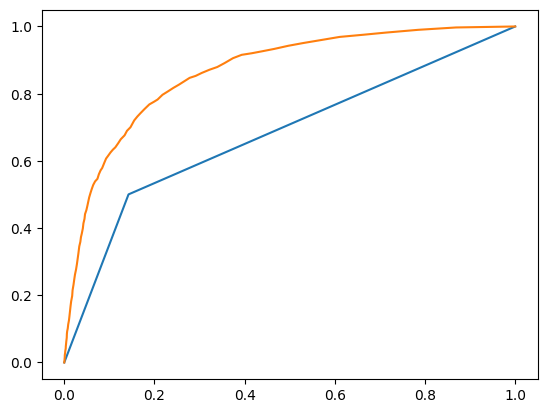

In [8]:
# 定义模型列表
models = [tree_model, rf_model, svm_model, knn_model]

# 定义模型名称列表
model_names = ['Decision Tree', 'Random Forest', 'SVM', 'KNN']

# 遍历模型列表并绘制 ROC 曲线
for i in range(len(models)):
    # 训练模型
    models[i].fit(X_train, y_train)
    # 预测测试集结果
    y_pred_prob = models[i].predict_proba(X_test)[:, 1]
    # 计算 FPR 和 TPR
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    # 计算 AUC
    roc_auc = auc(fpr, tpr)
    # 绘制 ROC 曲线
    plt.plot(fpr, tpr,label=model_names[i] + ' (AUC = %0.2f)' % roc_auc)

# 绘制完整的 ROC 曲线
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# 创建 KFold 对象，指定折数为 5
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 进行交叉验证并计时
start_time = time.time()
tree_scores = cross_val_score(tree_model, X, y, cv=kf, scoring='accuracy')
end_time = time.time()
print('Decision Tree cross-validation scores:', tree_scores)
print('Time taken:', end_time - start_time, 'seconds')

start_time = time.time()
rf_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='accuracy')
end_time = time.time()
print('Random Forest cross-validation scores:', rf_scores)
print('Time taken:', end_time - start_time, 'seconds')

start_time = time.time()
svm_scores =cross_val_score(svm_model, X, y, cv=kf, scoring='accuracy')
end_time = time.time()
print('SVM cross-validation scores:', svm_scores)
print('Time taken:', end_time - start_time, 'seconds')

start_time = time.time()
knn_scores = cross_val_score(knn_model, X, y, cv=kf, scoring='accuracy')
end_time = time.time()
print('KNN cross-validation scores:', knn_scores)
print('Time taken:', end_time - start_time, 'seconds')


In [ ]:
# 训练决策树模型并计时
start_time = time.time()
tree_model.fit(X_train, y_train)
end_time = time.time()
print('Time taken for training Decision Tree:', end_time - start_time, 'seconds')

# 训练随机森林模型并计时
start_time = time.time()
rf_model.fit(X_train, y_train)
end_time = time.time()
print('Time taken for training Random Forest:', end_time - start_time, 'seconds')

# 训练支持向量机模型并计时
start_time = time.time()
svm_model.fit(X_train, y_train)
end_time =time.time()
print('Time taken for training SVM:', end_time - start_time, 'seconds')

# 训练KNN模型并计时
start_time = time.time()
knn_model.fit(X_train, y_train)
end_time = time.time()
print('Time taken for training KNN:', end_time - start_time, 'seconds')

In [11]:
# 在测试集上进行预测
tree_pred = tree_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

In [12]:
# 计算模型的准确率和混淆矩阵
tree_acc = accuracy_score(y_test, tree_pred)
tree_cm = confusion_matrix(y_test, tree_pred)

rf_acc = accuracy_score(y_test, rf_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

svm_acc = accuracy_score(y_test, svm_pred)
svm_cm = confusion_matrix(y_test, svm_pred)

knn_acc = accuracy_score(y_test, knn_pred)
knn_cm = confusion_matrix(y_test, knn_pred)


# 输出模型的性能指标
print('Decision Tree accuracy:', tree_acc)
print('Random Forest accuracy:', rf_acc)
print('KNN accuracy:', knn_acc)
print('SVM accuracy:', svm_acc)

print('Decision Tree confusion matrix:', tree_cm)
print('Random Forest confusion matrix:', rf_cm)
print('SVM confusion matrix:', svm_cm)
print('KNN confusion matrix:', knn_cm)

print('Decision Tree classification report:\n', classification_report(y_test, tree_pred))
print('Random Forest classification report:\n', classification_report(y_test, rf_pred))
print('SVM classification report:\n', classification_report(y_test, svm_pred))
print('KNN classification report:\n',classification_report(y_test, knn_pred))


Decision Tree accuracy: 0.7857989568515884
Random Forest accuracy: 0.8493361782835467
KNN accuracy: 0.8238501659554291
SVM accuracy: 0.8428165007112376
Decision Tree confusion matrix: [[5761  968]
 [ 839  868]]
Random Forest confusion matrix: [[6338  391]
 [ 880  827]]
SVM confusion matrix: [[6426  303]
 [1023  684]]
KNN confusion matrix: [[6377  352]
 [1134  573]]
Decision Tree classification report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      6729
           1       0.47      0.51      0.49      1707

    accuracy                           0.79      8436
   macro avg       0.67      0.68      0.68      8436
weighted avg       0.79      0.79      0.79      8436

Random Forest classification report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      6729
           1       0.68      0.48      0.57      1707

    accuracy                           0.85      8436
   macro av

In [ ]:
# 定义邻居数列表
# n_neighbors = [1, 3, 5, 7, 9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,101]
n_neighbors = []
# 创建 KFold 对象，指定折数为 5
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 定义空列表存储交叉验证分数和测试集准确率
cv_scores = []
test_scores = []

# 循环遍历不同的邻居数
for k in range(5,102,2):
    n_neighbors.append(k)
    # 创建 KNN 模型，指定邻居数
    
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # 进行交叉验证
    cv_results = cross_val_score(knn_model, X, y, cv=kf, scoring='accuracy')

    # 计算交叉验证分数的平均值
    cv_scores.append(np.mean(cv_results))

    # 在缩放后的训练集上进行拟合
    knn_model.fit(X_train_scaled, y_train)

    # 在缩放后的测试集上进行预测
    knn_pred = knn_model.predict(X_test_scaled)

    # 计算模型在测试集上的准确率
    test_scores.append(accuracy_score(y_test, knn_pred))

# 绘制折线图
plt.plot(n_neighbors, cv_scores, label='Cross-validation score')
plt.plot(n_neighbors, test_scores, label='Test score')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('KNN accuracy with different number of neighbors')
plt.legend()
plt.show()